# Assignment 2: Detecting Linux system hacking activities Part B

#### Student Name: Soyeon Kim

## 2. Consuming data using Kafka

In this task, we will implement multiple Apache Kafka consumers to consume the data from
task 1.<br>

<strong>Important :
- In this task, use Kafka consumer to consume the data from task 1.
- Do not use Spark in this task

### 2.1 Process Event Consumer 
Write a python program that consumes the process events using kafka consumer, visualise
the record counts in real time. 
Your program should get the count of records arriving in the last 2-minutes (<strong>use the
processing time</strong>) for each machine, and use line charts to visualise.<br><br>

- Hint - x-axis can be used to represent the timeline, while y-axis can be used to
represent the count; each machine’s line data can be represented in different color
legends

<IPython.core.display.Javascript object>


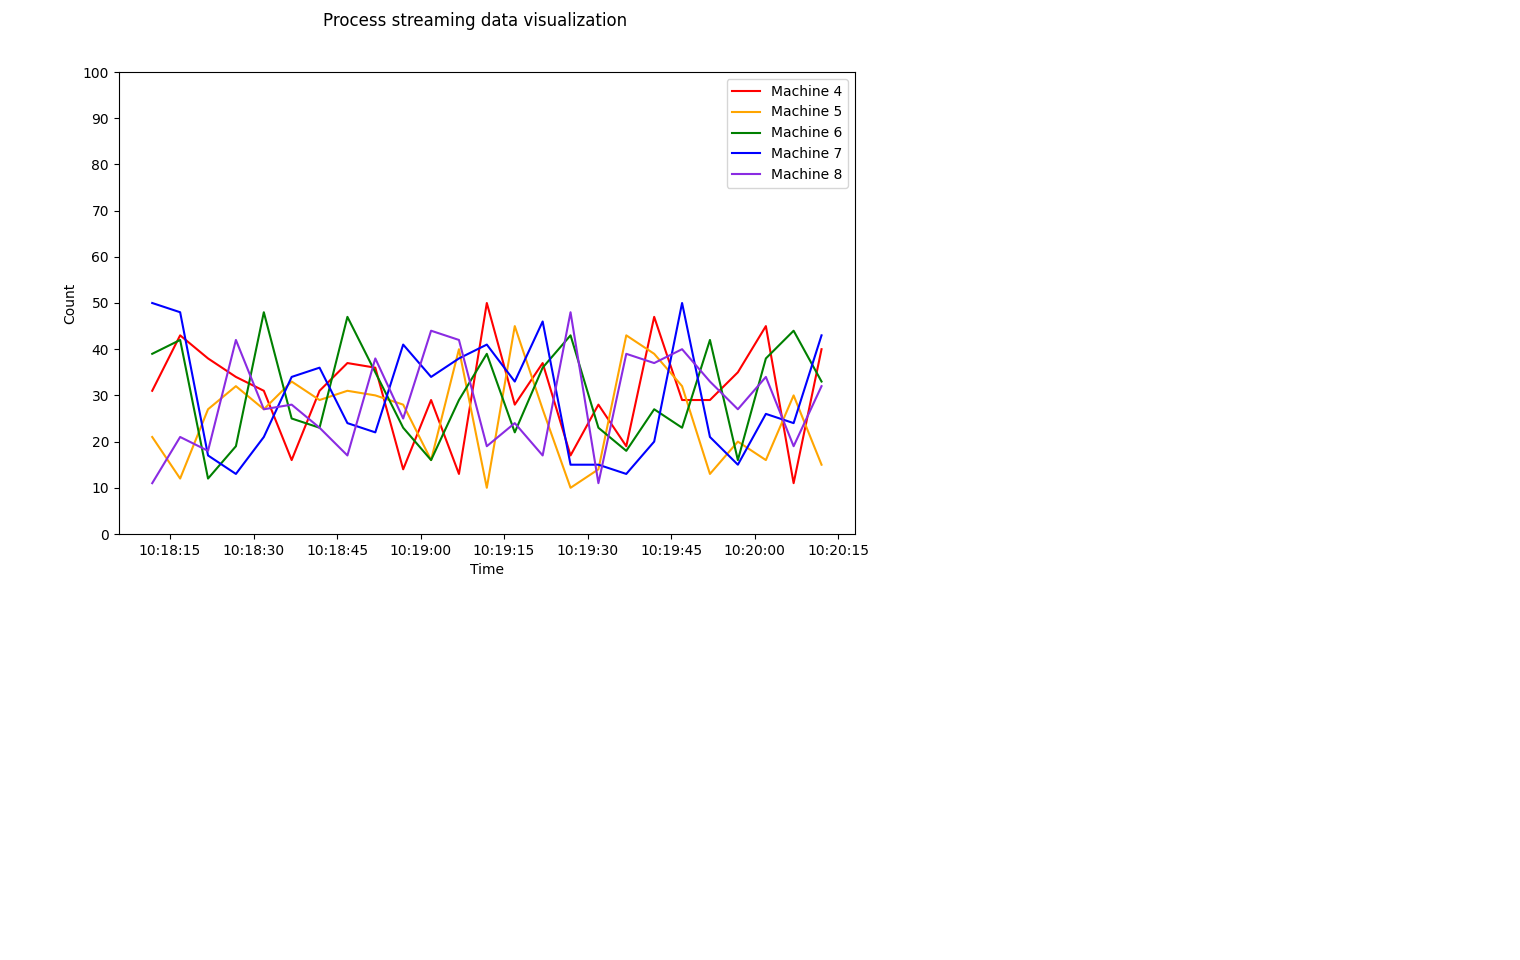

KeyboardInterrupt: 

In [1]:
# import statements
from json import loads
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'Streaming_Linux_process'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   #consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
        ax = fig.add_subplot(111)
        ax.set_xlabel('Time')
        ax.set_ylabel('Count')
        fig.suptitle('Process streaming data visualization') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y4, y5, y6, y7, y8 = [], [], [], [], [], []
        
        for message in consumer:           
               
            # count the number of the records of each macine
            counter_4 = 0
            counter_5 = 0
            counter_6 = 0
            counter_7 = 0
            counter_8 = 0
            
            for val in message.value: 
                # machine 4
                if val["machine"] == 4:  
                    counter_4 = counter_4 + 1         
                # machine 5        
                if val["machine"] == 5:
                    counter_5 = counter_5 + 1     
                # machine 6
                if val["machine"] == 6:
                    counter_6 = counter_6 + 1
                # machine 7        
                if val["machine"] == 7:
                    counter_7 = counter_7 + 1   
                # machine 8        
                if val["machine"] == 8:
                    counter_8 = counter_8 + 1  
                    
            y4.append(counter_4) 
            y5.append(counter_5)
            y6.append(counter_6)
            y7.append(counter_7) 
            y8.append(counter_8)
            
            # timestamp
            ts = dt.datetime.utcnow()
            x.append(ts) 
                            
            # last 2-minutes (120 = 5 * 24)            
            if len(x) > 24:
                ax.clear()
                ax.plot(x, y4, color = 'red', label='Machine 4')                
                ax.plot(x, y5, color = 'orange', label='Machine 5')
                ax.plot(x, y6, color = 'green', label='Machine 6')
                ax.plot(x, y7, color = 'blue', label='Machine 7')
                ax.plot(x, y8, color = 'blueviolet', label='Machine 8')
                ax.set_ylim(0,100) 
                ax.set_yticks([0,10,20, 30, 40, 50, 60, 70, 80, 90, 100])
                ax.legend(loc="upper right")
                ax.set_xlabel('Time')
                ax.set_ylabel('Count')
                
                fig.canvas.draw()
                # removing the item in the first position
                x.pop(0) 
                y4.pop(0)
                y5.pop(0)
                y6.pop(0)
                y7.pop(0)
                y8.pop(0)
                
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
